In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
class task_generator:
    def __init__(self, n, k):
        self.n = n
        self.k = k
        self.A = self.generate_a()
        self.b = self.generate_b()

    def generate_a(self) -> np.ndarray:
        diagonal_elements = np.random.randint(1, self.k+1, size=self.n)

        diagonal_elements[np.min(diagonal_elements) == diagonal_elements] = 1
        diagonal_elements[np.max(diagonal_elements) == diagonal_elements] = self.k

        diagonal_matrix = np.diag(diagonal_elements)

        return diagonal_matrix

    def generate_b(self) -> np.ndarray:
        b = np.random.random(self.n)
        return b # strange assertion

    def f(self, x: np.ndarray) -> float:
        return np.dot(x.T, np.dot(self.A, x)) + np.dot(self.b.T, x)
    
    def grad(self, x: np.ndarray) -> np.ndarray:
        return 2 * np.dot(self.A, x) + self.b
    
    def norm(self, x: np.ndarray) -> int:
        norm = np.sqrt(np.dot(x.T, x))
        return norm

    def gradient_descent(self, lr: float, x0: np.ndarray, eps: float = 10e-5, max_iters: int = 10000) -> np.ndarray:
        dots: list = []
        x = x0
        norm0 = self.norm(self.grad(x0))
        for i in range(max_iters):
            norm = self.norm(self.grad(x))
            if norm <= eps * norm0:
                return np.array(dots)
            dots.append(x)
            x = x - lr * self.grad(x)
        return np.array(dots)

In [71]:
def plot_function_with_gradients_and_points(func, points, x_range=(-5, 5), y_range=(-5, 5), resolution=100):
    """
    Plot a 2D function with its contours, gradient level curves, and given points.
    
    Parameters:
    func (callable): A function of two variables (x, y)
    points (numpy.ndarray): Array of shape (n, 2) containing points to plot
    x_range, y_range (tuple): Ranges for x and y axes
    resolution (int): Number of points in each dimension for the mesh grid
    """
    # Create a mesh grid for the contour plot
    x = np.linspace(x_range[0], x_range[1], resolution)
    y = np.linspace(y_range[0], y_range[1], resolution)
    X, Y = np.meshgrid(x, y)

    # Combine the X and Y coordinates into a single array, (x, y) pairs
    coordinates = np.stack((X.ravel(), Y.ravel()), axis=-1)

    # Compute function values on the grid
    Z_flat = np.array([func(coord) for coord in coordinates])  # Use a list comprehension

    # Reshape Z_flat to the original grid shape
    Z = Z_flat.reshape(X.shape)
    
    # Create the plot
    plt.figure(figsize=(10, 8))
    
    # Plot contour lines (level curves)
    contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')
    plt.clabel(contour, inline=True, fontsize=8)
    
    # Plot the filled contour to show the function values
    plt.contourf(X, Y, Z, levels=20, alpha=0.6, cmap='viridis')
    
    # Add a color bar
    plt.colorbar(label='Function Value')
    
    # Plot the points
    print(f'Gradient descent size: {points.shape[0]}')
    plt.scatter(points[:, 0], points[:, 1], color='red', s=10, marker='o', label='Points')
    
    # Set labels and title
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Function Contours with Points')
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.tight_layout()
    plt.show()


Gradient descent size: 4141


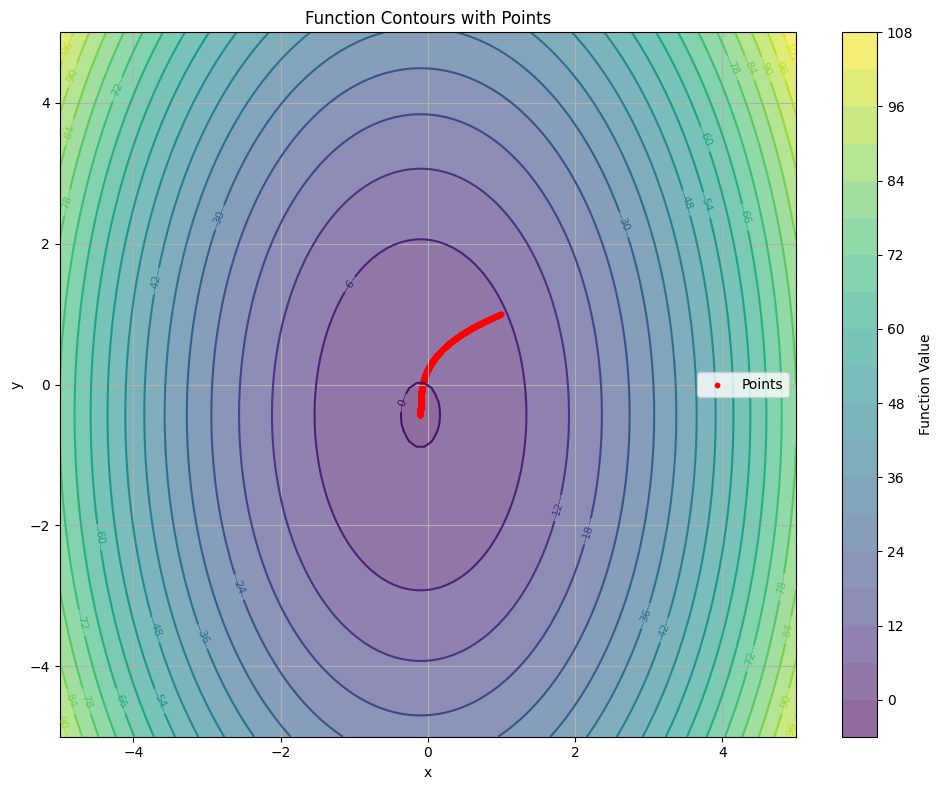

In [72]:
n, k = 2, 3

task = task_generator(n, k)
dots = task.gradient_descent(0.001, np.array((1, 1)))
plot_function_with_gradients_and_points(task.f, dots)

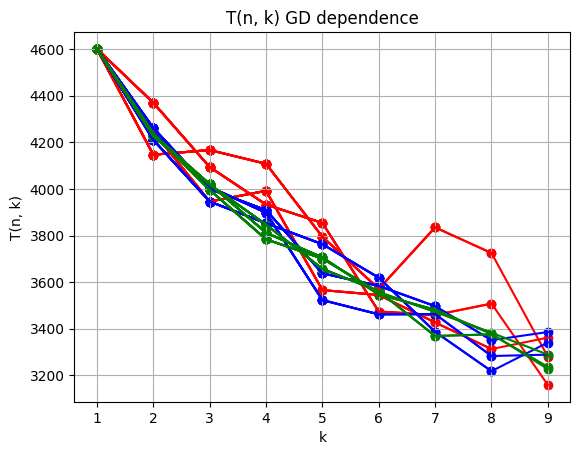

In [91]:
lr = 0.001
iter_count = 3
N = [10, 100, 1000]
colors = ['red', 'blue', 'green']
for n, color in zip(N, colors):
  for iter in range(iter_count):
    T = []
    K = []
    for k in range(1, 10):
      task = task_generator(n, k)
      t = task.gradient_descent(lr, np.ones(n)).shape[0]
      T.append(t)
      K.append(k)
      plt.scatter(K, T, color=color)
      plt.plot(K, T, color=color)

plt.xlabel("k")
plt.ylabel("T(n, k)")
plt.title("T(n, k) GD dependence")
plt.grid(True)
plt.show()